<a href="https://colab.research.google.com/github/MikeDeecode/US-accidental--drugs-death-analysis/blob/master/US_accidental_drugs_death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set used in this project was obtained from https://www.data.gov/

## **THE DATASET CONTAINS THE DATA OF ACCIDENTAL DRUGS RELATED DEATH IN THE US FROM 2012 TO 2016**

---



This project aims aat 

* Determine how each of the characteristics affected the death toll
* Visualising the analysed data
* Insigts and observations from the data

Stay tuned!!!

# **EXPLORATORY ANALYSIS**

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drugs_death = pd.read_csv("/content/Accidental_Drug_Related_Deaths_2012-2018.csv", index_col = 0)
print ("Success")

Success


In [3]:
drugs_death.shape

(5105, 40)

* There are 5105 rows and 40 columns in the dataset 

**DESCRIPTION OF THE DATASET**

There are 5105 rowa and 40 columns in the dataset.  Below are the descriptions of the columns 

* **ID** - citizen's identification number 
* **Date** - The date authorities knew about the death
* **Dateatype** - If the date the individual died was the reported date or the day of death
* **Age** - Age of the individual
* **Sex** - Gender of the individual
* **Race** - The race of the individual
* **ResidenceCity** - The city the individual lived in 
* **ResidenceCounty** - Individual's county
* **ResidenceState** - Individual's state 
* **DeathCity** - city where the individual died 
* **DeathCounty** - County where the individual died 
* **Location** - specific place where the individual died
* **LocationifOther**
* **DescriptionofInjury** - Description of injury that killed the individual
* **InjuryPlace** - where the injury was sustained
* **InjuryCity** - city where the injury was sustained 
* **InjuryCounty** - County where the injury was sustained 
* **InjuryState** - State where the injuty was sustained 
* **COD** - Cause of death
* **OtherSignifican**
* **MannerofDeath** - how the individual died 
* **DeathCityGeo** - Geogrgraphical location of where the individual died 
* **ResidenceCityGeo** - geographical location of individual's residence city 
* **InjuryCityGeo** - geographical location of where the individual sustained injury

Other columns in the dataset are the substances presnt in the blood or urine of the individuals after the autopsy report

In [4]:
drugs_death.head()

,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [5]:
drugs_death.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5105 entries, 14-0273 to 16-0637
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 5103 non-null   object 
 1   DateType             5103 non-null   object 
 2   Age                  5102 non-null   float64
 3   Sex                  5099 non-null   object 
 4   Race                 5092 non-null   object 
 5   ResidenceCity        4932 non-null   object 
 6   ResidenceCounty      4308 non-null   object 
 7   ResidenceState       3556 non-null   object 
 8   DeathCity            5100 non-null   object 
 9   DeathCounty          4005 non-null   object 
 10  Location             5081 non-null   object 
 11  LocationifOther      590 non-null    object 
 12  DescriptionofInjury  4325 non-null   object 
 13  InjuryPlace          5039 non-null   object 
 14  InjuryCity           3349 non-null   object 
 15  InjuryCounty         2364 non-null

* As seen above the dataset contains a lot of missing values 

Here I removed the columns I do not want to perfrom analysis on 

In [0]:
drugs_death.drop(columns = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone',
                            'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 
                            'Other', 'OpiateNOS', 'AnyOpioid', 'OtherSignifican', 'DeathCityGeo', 
                            'ResidenceCityGeo', 'InjuryCityGeo', 'LocationifOther'], inplace = True)

Below are the remaining columns in the data

In [7]:
drugs_death.head()

,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,MannerofDeath
ID,,,,,,,,,,,,,,,,,,
14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",Accident
13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,Accident
16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,Accident
16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,Accident
13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,Accident


###DATE TYPE

**PERCENTAGE OF DATE OF DEATH TO DATE DEATH WAS REPORTED**

In [8]:
drugs_death['DateType'].value_counts()

DateofDeath     2822
DateReported    2281
Name: DateType, dtype: int64

* 2822 deaths were confirmed by the officials 
* 2281 deaths were reported

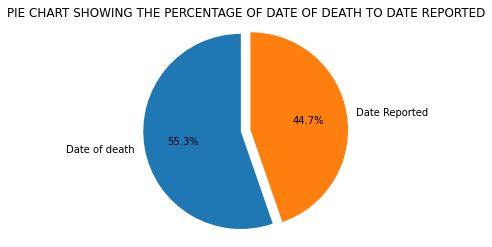

In [20]:
labels = 'Date of death', 'Date Reported'
size = [2822, 2281]
explode = [0, 0.1]

fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("PIE CHART SHOWING THE PERCENTAGE OF DATE OF DEATH TO DATE REPORTED")
plt.show()

* 55.3 percent of the deaths were confirmed by the officials
* 44.7 percent of the deaths were reported to the authorities

###SEX

**NUMBER OF PEOPLE THAT DIED FROM DRUGS BY GENDER**

In [9]:
drugs_death['Sex'].value_counts()

Male       3773
Female     1325
Unknown       1
Name: Sex, dtype: int64

* 3773 

In [10]:
drugs_death['Race'].value_counts()

White                     4004
Hispanic, White            561
Black                      433
Hispanic, Black             24
Unknown                     23
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64

In [11]:
drugs_death['Location'].value_counts()

Residence            2677
Hospital             1626
Other                 773
Convalescent Home       3
Hospice                 1
Nursing Home            1
Name: Location, dtype: int64

In [12]:
drugs_death['MannerofDeath'].value_counts()

Accident    5066
Pending       14
accident      13
Natural        1
ACCIDENT       1
Name: MannerofDeath, dtype: int64

In [0]:
drugs_death['MannerofDeath'].replace(to_replace = 'ACCIDENT', value = 'Accident', inplace = True)
drugs_death['MannerofDeath'].replace(to_replace = 'accident', value = 'Accident', inplace = True)


In [14]:
drugs_death['MannerofDeath'].value_counts()

Accident    5080
Pending       14
Natural        1
Name: MannerofDeath, dtype: int64